In [3]:
!gdown 1r2Sb4ogBjRR1Wu28gy9X2D4WmOdFoICT
!gdown 1JRN1IcKBL-Q_j0JTFgi8Arn9bmJJ8aEJ

Downloading...
From: https://drive.google.com/uc?id=1r2Sb4ogBjRR1Wu28gy9X2D4WmOdFoICT
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 16.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JRN1IcKBL-Q_j0JTFgi8Arn9bmJJ8aEJ
To: /content/zipcodes.csv
100% 590/590 [00:00<00:00, 2.57MB/s]


In [21]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

def load_data_from_file(fileName="advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]  # The first 3 columns are the features
    sales_Y = data[:, 3]      # The 4th column is the sales (target variable)

    features_X = np.insert(features_X, 0, 1, axis=1)  # Add a column of ones for the bias term
    return features_X, sales_Y


In [25]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [24]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [31]:
def create_individual(n=4, bound=10):
    # Generate 'n' random values for the individual within the range [-bound/2, bound/2]
    individual = [random.uniform(-bound/2, bound/2) for _ in range(n)]
    return individual

In [32]:
individual = create_individual()
print(individual)

[-0.23403045847644144, 0.8338203945503118, 4.081128851953352, 0.046868558173902564]


In [29]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)  # Fitness function as 1 / (loss + 1)
    return fitness_value


In [33]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [34]:
def crossover(individual1, individual2, crossover_rate=0.9):
    if random.random() < crossover_rate:
        point = random.randint(1, len(individual1) - 1)  # Crossover point
        new_individual1 = individual1[:point] + individual2[point:]
        new_individual2 = individual2[:point] + individual1[point:]
    else:
        new_individual1, new_individual2 = individual1, individual2
    return new_individual1, new_individual2


In [35]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [4.09, 2.57, -0.79, -2.41]
individual2:  [3.44, 4.82, 3.1, 4.02]


In [36]:
def mutate(individual, mutation_rate=0.05):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = individual[i] + random.uniform(-0.5, 0.5)  # Mutate by a small value
    return individual


In [37]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [38]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [39]:
population = initializePopulation(100)
print(len(population))

100


In [40]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [41]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[1.726678813176303, 2.3560265676171586, -1.8776790412589506, 3.599943994333726]


In [42]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness, reverse=True)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[0]), "with chromosome:", sorted_population[0])

    new_population = []
    while len(new_population) < m - elitism:
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.append(child1)
        new_population.append(child2)

    # Elitism: retain the best individuals
    new_population.extend(sorted_population[:elitism])

    return new_population, compute_loss(sorted_population[0])


In [43]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromosome: [3.44, 2.57, -0.79, -2.41]


In [49]:
def run_GA(n_generations=100, m=600):
    features_X, sales_Y = load_data_from_file("advertising.csv") #This line may not be needed
    population = initializePopulation(m)
    losses_list = []

    for i in range(n_generations):
        # remove features_X and sales_Y from the function call
        population, best_loss = create_new_population(population, elitism=2, gen=i+1)
        losses_list.append(best_loss)

    return losses_list

In [50]:
losses_list = run_GA()

Best loss: 872.627719319768 with chromosome: [2.638140134985494, 0.2617930854319974, 0.6533571744947997, -1.1599478946677122]
Best loss: 872.627719319768 with chromosome: [2.638140134985494, 0.2617930854319974, 0.6533571744947997, -1.1599478946677122]
Best loss: 872.627719319768 with chromosome: [2.638140134985494, 0.2617930854319974, 0.6533571744947997, -1.1599478946677122]
Best loss: 872.627719319768 with chromosome: [2.638140134985494, 0.2617930854319974, 0.6533571744947997, -1.1599478946677122]
Best loss: 872.627719319768 with chromosome: [2.638140134985494, 0.2617930854319974, 0.6533571744947997, -1.1599478946677122]
Best loss: 872.627719319768 with chromosome: [2.638140134985494, 0.2617930854319974, 0.6533571744947997, -1.1599478946677122]
Best loss: 872.627719319768 with chromosome: [2.638140134985494, 0.2617930854319974, 0.6533571744947997, -1.1599478946677122]
Best loss: 872.627719319768 with chromosome: [2.638140134985494, 0.2617930854319974, 0.6533571744947997, -1.1599478946

Best loss: 1681.3441839260968 with chromosome: [2.1183943831186145, -0.2438674472565472, 1.3392859589531172, -0.3254387159805816]
Best loss: 1681.3441839260968 with chromosome: [2.1183943831186145, -0.2438674472565472, 1.3392859589531172, -0.3254387159805816]
Best loss: 1681.3441839260968 with chromosome: [2.1183943831186145, -0.2438674472565472, 1.3392859589531172, -0.3254387159805816]
Best loss: 1681.3441839260968 with chromosome: [2.1183943831186145, -0.2438674472565472, 1.3392859589531172, -0.3254387159805816]
Best loss: 1681.3441839260968 with chromosome: [2.1183943831186145, -0.2438674472565472, 1.3392859589531172, -0.3254387159805816]
Best loss: 1681.3441839260968 with chromosome: [2.1183943831186145, -0.2438674472565472, 1.3392859589531172, -0.3254387159805816]
Best loss: 1681.3441839260968 with chromosome: [2.1183943831186145, -0.2438674472565472, 1.3392859589531172, -0.3254387159805816]
Best loss: 1681.3441839260968 with chromosome: [2.1183943831186145, -0.2438674472565472, 1

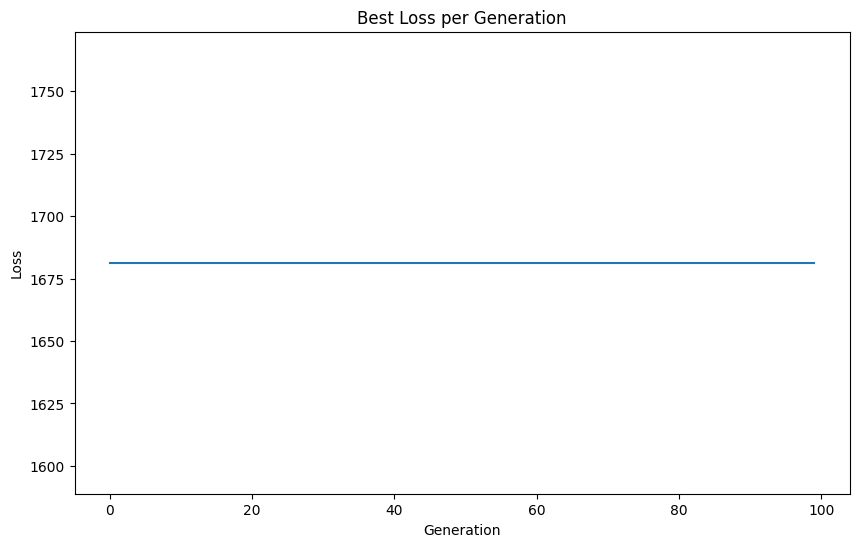

In [51]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.figure(figsize=(10, 6))
    plt.plot(losses_list)
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.title('Best Loss per Generation')
    plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

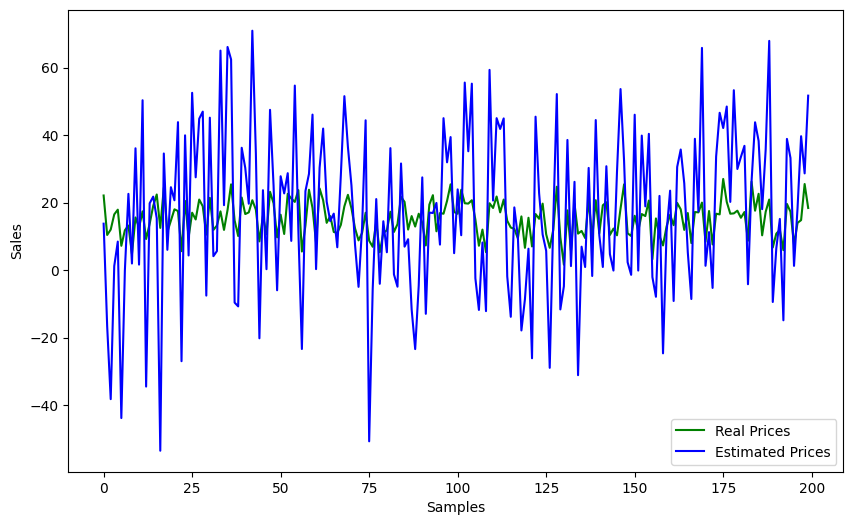

In [53]:
def visualize_predict_gt():
    features_X, sales_Y = load_data_from_file("advertising.csv")
    population = initializePopulation(600)
    # Modify the lambda function to pass only 'ind' to compute_fitness
    # Assuming compute_fitness is modified to use global features_X and sales_Y or they are passed as arguments during the function call

    # Option 1: If compute_fitness uses global variables:
    sorted_population = sorted(population, key=lambda ind: compute_fitness(ind), reverse=True)

    # Option 2: If compute_fitness takes features_X and sales_Y as arguments:
    # sorted_population = sorted(population, key=lambda ind: compute_fitness(ind, features_X, sales_Y), reverse=True)
    # In this case, modify the compute_fitness definition accordingly:
    # def compute_fitness(ind, features_X, sales_Y):
    #    # your logic here using features_X and sales_Y

    best_individual = sorted_population[0]
    theta = np.array(best_individual)
    estimated_prices = features_X.dot(theta)

    plt.figure(figsize=(10, 6))
    plt.plot(sales_Y, label='Real Prices', color='green')
    plt.plot(estimated_prices, label='Estimated Prices', color='blue')
    plt.xlabel('Samples')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

visualize_predict_gt()

[-3.574325117813987, -0.37564645472787905, 1.3730352436378146, -0.16712011731899779]


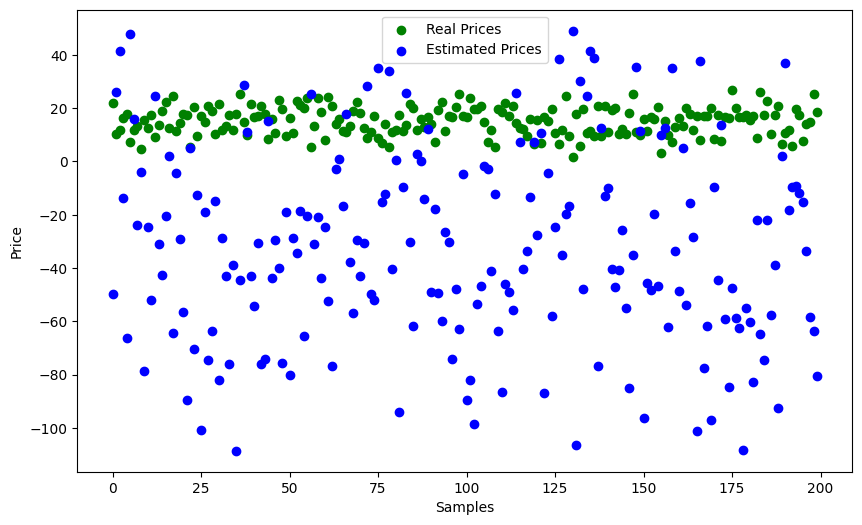

In [54]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()